### Importing dataset from Roboflow

Contains images of license plate along with the character object detections

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Cy4a2I0GCjuGakbkjIrQ")
project = rf.workspace("college-fyp-ewmvi").project("final-fyp-dataset")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.25, to fix: `pip install ultralytics==8.0.196`


Vieewing the project's version through Roboflow API
Model = license_detector

In [2]:
model = project.version("1").model
print(model)

{
  "id": "final-fyp-dataset/1",
  "name": "final-fyp-dataset",
  "version": "1",
  "classes": null,
  "overlap": 30,
  "confidence": 40,
  "stroke": 1,
  "labels": false,
  "format": "json",
  "base_url": "https://detect.roboflow.com/"
}


In [3]:
license_detector = project.version(1).model

Changing the confidence of the model along with the overlap

In [4]:
license_detector.confidence = 40
license_detector.overlap = 15

Testing the prediction on an image

In [5]:
prediction = license_detector.predict("predict.jpg")

Plotting the prediction in an interactive environment

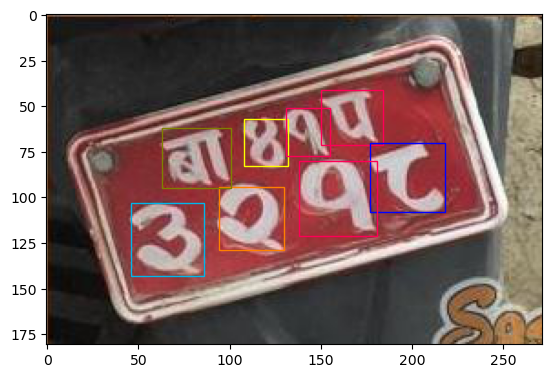

In [6]:
prediction.plot()

In [7]:
json_data = prediction.json()
print(json_data)

{'predictions': [{'x': 66.0, 'y': 123.0, 'width': 40.0, 'height': 40.0, 'confidence': 0.9550176858901978, 'class': '3', 'class_id': 3, 'detection_id': 'ef5c50db-7e7f-4e28-a9ec-2980a6daea30', 'image_path': 'predict.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 112.0, 'y': 111.5, 'width': 36.0, 'height': 35.0, 'confidence': 0.9522336721420288, 'class': '2', 'class_id': 2, 'detection_id': 'dfd6a244-22e6-4638-8ca6-070444b347a6', 'image_path': 'predict.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 82.0, 'y': 78.5, 'width': 38.0, 'height': 33.0, 'confidence': 0.9438292384147644, 'class': 'ba', 'class_id': 10, 'detection_id': 'c18b2932-d741-4f40-ba36-ab6f6c0a2371', 'image_path': 'predict.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 167.0, 'y': 56.0, 'width': 34.0, 'height': 30.0, 'confidence': 0.9432401061058044, 'class': 'pa', 'class_id': 25, 'detection_id': '3d18ab57-ba81-4eca-a346-2a23efe6814c', 'image_path': 'predict.jpg', 'prediction_type': 'ObjectDetection

In [8]:
def concatenate_classes(json_data):
    predictions = json_data['predictions']
    # We have the sort the predictions by y and then x to get the characters in the correct order
    sorted_predictions = sorted(predictions, key=lambda x: (x['y'], x['x']))
    classes = [prediction['class'] for prediction in sorted_predictions]
    
    # Separate the characters into two groups: top and bottom so that the user can read efficiently
    top_characters = classes[:4][::-1]
    bottom_characters = classes[4:][::-1]
    
    # Concatenate the characters in the desired order
    concatenated_classes = ', '.join(top_characters) + '\n' + ', '.join(bottom_characters)
    return concatenated_classes 

print(concatenate_classes(json_data))


ba, 4, 1, pa
3, 2, 1, 8


Printing out all the classes that could be contained in an image

In [9]:
# Printing out the classes

project_classes = project.classes
for values in project_classes:
    print(values)

# Printing out the number of classes that the model can detect
print("The model contains", len(project_classes), "classes")

0
1
2
3
4
5
6
7
8
9
lu
license-plate
ka
bagmati
me
ga
cha
gha
jha
ko
kha
madesh
ra
pa
na
ja
pradesh
ba
The model contains 28 classes


In [10]:
prediction1 = license_detector.predict("predict1.png")

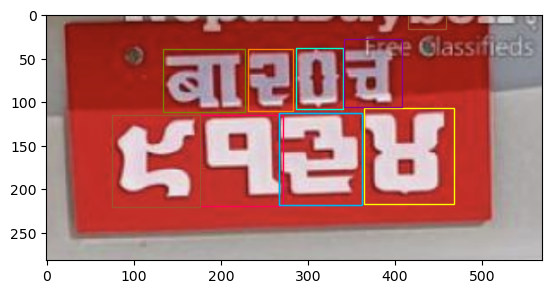

In [11]:
prediction1.plot()

In [12]:
prediction1json = prediction1.json()
def read_classes(prediction1json):

  predictions = prediction1json['predictions']

  # Sort predictions based on y-coordinate (height) first, then x-coordinate (left-to-right)
  sorted_predictions = sorted(predictions, key=lambda x: (x['y'], x['x']))

  # Split the characters into two rows
  classes = [prediction['class'] for prediction in sorted_predictions]
  row1 = classes[:4]
  row2 = classes[4:]

  # Sort each row based on the first character (assuming all digits are left-aligned)
  def sort_by_first_char(text):
    try:
      return int(text[0])
    except ValueError:
      # Handle non-numeric characters (place them after digits)
      return 100

  row1 = sorted(row1, key=sort_by_first_char)
  row2 = sorted(row2, key=sort_by_first_char)

  # Concatenate the characters in the desired order
  concatenated_classes = ', '.join(row1) + '\n' + ', '.join(row2)
  return concatenated_classes

print(concatenate_classes(prediction1json))



2, 0, cha, 9
9, 1, 3, 6, 4, ba


In [13]:
prediction1json

{'predictions': [{'x': 180.5,
   'y': 75.0,
   'width': 95.0,
   'height': 72.0,
   'confidence': 0.944726824760437,
   'class': 'ba',
   'class_id': 10,
   'detection_id': 'ed4f2bc4-9f4e-4a88-a18c-6854ffe7ac28',
   'image_path': 'predict1.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 223.5,
   'y': 167.0,
   'width': 95.0,
   'height': 104.0,
   'confidence': 0.936123251914978,
   'class': '1',
   'class_id': 1,
   'detection_id': '6589588d-9585-451f-97fc-ddf3c4c30400',
   'image_path': 'predict1.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 313.0,
   'y': 72.5,
   'width': 54.0,
   'height': 71.0,
   'confidence': 0.9347714185714722,
   'class': '0',
   'class_id': 0,
   'detection_id': '93bbb7e2-5233-4b59-b4bb-86ad7b80fa6c',
   'image_path': 'predict1.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 257.0,
   'y': 74.5,
   'width': 52.0,
   'height': 71.0,
   'confidence': 0.9296677708625793,
   'class': '2',
   'class_id': 2,
   'detection_

In [14]:
def concat_row(prediction1json):
    predictions = prediction1json['predictions']
    
    # Sort predictions based on y-coordinate (height) first, then x-coordinate (left-to-right)
    sorted_predictions = sorted(predictions, key=lambda x: (x['y'], x['x']))
    
    # Collect classes
    classes = [prediction['class'] for prediction in sorted_predictions]
    
    # Calculate the number of columns (assuming characters are aligned vertically)
    num_columns = len(set(prediction['x'] for prediction in sorted_predictions))
    
    # Initialize concatenated string
    concatenated_classes = ''
    
    # Loop through rows and columns to concatenate classes
    for i in range(0, len(classes), num_columns):
        row_classes = classes[i:i+num_columns]
        concatenated_classes += ', '.join(row_classes) + '\n'
    
    return concatenated_classes.strip()

print(concat_row(prediction1json))



9, cha, 0, 2, ba, 4, 6, 3, 1
9


### Testing prediction on a different image and cropping out the detected portions

In [35]:
prediction = license_detector.predict("/Users/sarthakshrestha/Documents/fyp ipnybs/test.png")

In [36]:
print(prediction)

{
  "x": 255.5,
  "y": 311.5,
  "width": 241.0,
  "height": 59.0,
  "confidence": 0.6617579460144043,
  "class": "license-plate",
  "class_id": 20,
  "detection_id": "1533f4a0-1d39-44d4-9eb9-f413a211b685",
  "image_path": "/Users/sarthakshrestha/Documents/fyp ipnybs/test.png",
  "prediction_type": "ObjectDetectionModel"
}




In [44]:
predictionjson = prediction.json()
predictionjson

{'predictions': [{'x': 255.5,
   'y': 311.5,
   'width': 241.0,
   'height': 59.0,
   'confidence': 0.6617579460144043,
   'class': 'license-plate',
   'class_id': 20,
   'detection_id': '1533f4a0-1d39-44d4-9eb9-f413a211b685',
   'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/test.png',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '717', 'height': '410'}}

In [45]:
print(predictionjson)

{'predictions': [{'x': 255.5, 'y': 311.5, 'width': 241.0, 'height': 59.0, 'confidence': 0.6617579460144043, 'class': 'license-plate', 'class_id': 20, 'detection_id': '1533f4a0-1d39-44d4-9eb9-f413a211b685', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/test.png', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '717', 'height': '410'}}


#### To Do: predict license-plate class only and crop out that specific section and then run the function to detect the characters

In [50]:
import cv2
import matplotlib.pyplot as plt

image_path = "/Users/sarthakshrestha/Documents/fyp ipnybs/test.png"
prediction_json = predictionjson

def show_roi_from_json(image_path, prediction_json):
    # Load the image
    image = cv2.imread(image_path)

    # Get the bounding box coordinates from the prediction
    bounding_box = prediction_json['predictions'][0]

    # Check if the class is 'license-plate'
    if bounding_box['class'] == 'license-plate':
        x = bounding_box['x']
        y = bounding_box['y']
        width = bounding_box['width']
        height = bounding_box['height']

        # Calculate the coordinates of the region of interest
        x1 = int(x - width / 2)
        y1 = int(y - height / 2)
        x2 = int(x + width / 2)
        y2 = int(y + height / 2)

        # Crop the region of interest from the image
        roi = image[y1:y2, x1:x2]

        # Showing the cropped region of interest
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Turn off axes
        plt.show()
        plt.savefig('/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png')

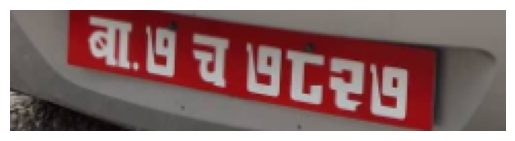

<Figure size 640x480 with 0 Axes>

In [51]:
show_roi_from_json(image_path, prediction_json)

### Trying to run the prediction again on the newly detected licnse plate model so the characters are read

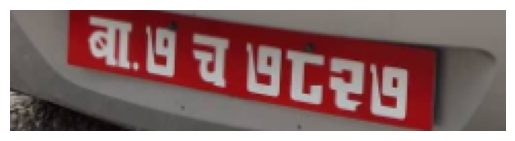

In [21]:
import cv2
import matplotlib.pyplot as plt

image_path = "/Users/sarthakshrestha/Documents/fyp ipnybs/test.png"
prediction_json = predictionjson

def show_roi_from_json(image_path, prediction_json):
    # Load the image
    image = cv2.imread(image_path)

    # Get the bounding box coordinates from the prediction
    bounding_box = prediction_json['predictions'][0]
    x = bounding_box['x']
    y = bounding_box['y']
    width = bounding_box['width']
    height = bounding_box['height']

    # Calculate the coordinates of the region of interest
    x1 = int(x - width / 2)
    y1 = int(y - height / 2)
    x2 = int(x + width / 2)
    y2 = int(y + height / 2)

    # Crop the region of interest from the image
    roi = image[y1:y2, x1:x2]

    # Save the cropped region of interest
    cv2.imwrite('/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png', roi)

    # Showing the cropped region of interest
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axes
    plt.savefig('/Users/sarthakshrestha/Documents/fyp ipnybs/prediction2.png')
    plt.show()

show_roi_from_json(image_path, prediction_json)


Function that will detect multiple license plates if present in an image

In [58]:
image_path = "/Users/sarthakshrestha/Documents/fyp ipnybs/multipletest.png"
prediction = license_detector.predict(image_path)

In [59]:
prediction2json = prediction.json()
# print(prediction2json)
prediction2json

{'predictions': [{'x': 378.0,
   'y': 353.0,
   'width': 254.0,
   'height': 58.0,
   'confidence': 0.8596367239952087,
   'class': 'license-plate',
   'class_id': 20,
   'detection_id': '4194668f-4053-45b1-8cb0-04386bed9f49',
   'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/multipletest.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 924.5,
   'y': 658.0,
   'width': 309.0,
   'height': 72.0,
   'confidence': 0.8099275827407837,
   'class': 'license-plate',
   'class_id': 20,
   'detection_id': 'b2fbeca9-0a21-4fae-a2ad-e2775bf85972',
   'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/multipletest.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 624.5,
   'y': 289.0,
   'width': 115.0,
   'height': 62.0,
   'confidence': 0.5650172829627991,
   'class': 'license-plate',
   'class_id': 20,
   'detection_id': '12099916-c74e-4a78-b80e-c5ba6c618ac4',
   'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/multipletest.png',
   'predicti

In [64]:
def show_license_plates_from_json(image_path, prediction_json):
    # Load the image
    image = cv2.imread(image_path)

    # Iterate through each prediction in the JSON
    for prediction in prediction_json['predictions']:
        # Check if the class is 'license-plate'
        if prediction['class'] == 'license-plate':
            x = prediction['x']
            y = prediction['y']
            width = prediction['width']
            height = prediction['height']

            # Calculate the coordinates of the region of interest
            x1 = int(x - width / 2)
            y1 = int(y - height / 2)
            x2 = int(x + width / 2)
            y2 = int(y + height / 2)

            # Cropping the region of interest from the images
            roi = image[y1:y2, x1:x2]

            # Showing the cropped region of interest of the detected license plates
            plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
            plt.axis('off')  # Turning off the axes
            plt.show()
            plt.savefig(f'/Users/sarthakshrestha/Documents/fyp ipnybs/multiple-lps/prediction_{prediction["class_id"]}.png')

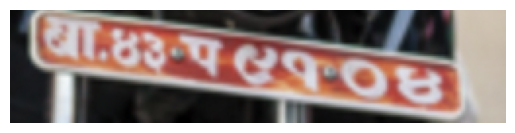

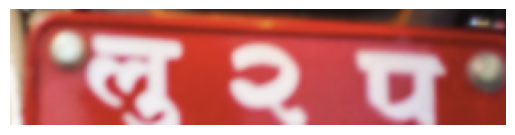

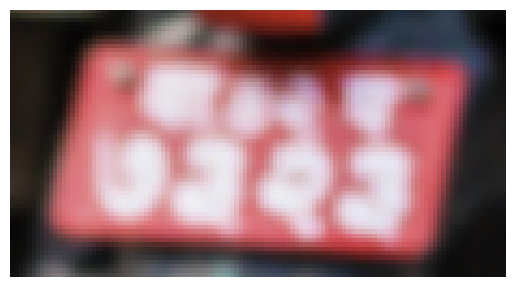

<Figure size 640x480 with 0 Axes>

In [65]:
show_license_plates_from_json(image_path, prediction2json)

Testing different image

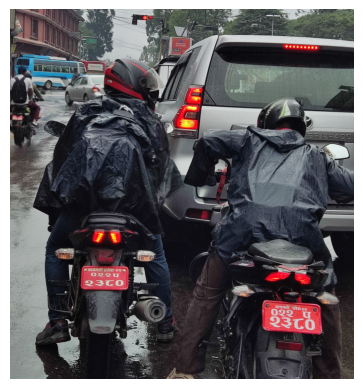

In [71]:
# Viewing the testing image
import matplotlib.pyplot as plt
from PIL import Image

image_path = "/Users/sarthakshrestha/Documents/fyp ipnybs/multipletest2.jpeg"
image = Image.open(image_path)

# Displaying the testing image
plt.imshow(image)
plt.axis('off')
plt.show()

In [66]:
image_path = "/Users/sarthakshrestha/Documents/fyp ipnybs/multipletest2.jpeg"
prediction = license_detector.predict(image_path)

In [68]:
prediction2json = prediction.json()
print(prediction2json)

{'predictions': [{'x': 1226.0, 'y': 1343.0, 'width': 306.0, 'height': 150.0, 'confidence': 0.8465587496757507, 'class': 'license-plate', 'class_id': 20, 'detection_id': '000b583b-56ae-4085-a3e5-0ae3bcbd5d1e', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/multipletest2.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 412.0, 'y': 1175.0, 'width': 222.0, 'height': 126.0, 'confidence': 0.8411271572113037, 'class': 'license-plate', 'class_id': 20, 'detection_id': '205a7dac-aaf5-4b96-9df5-ea3e37311476', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/multipletest2.jpeg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '1500', 'height': '1614'}}


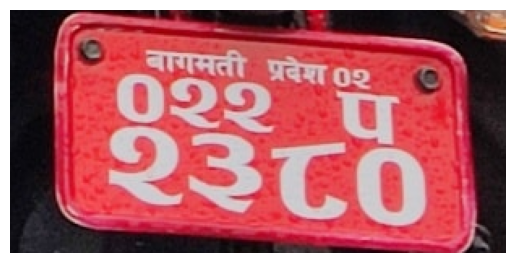

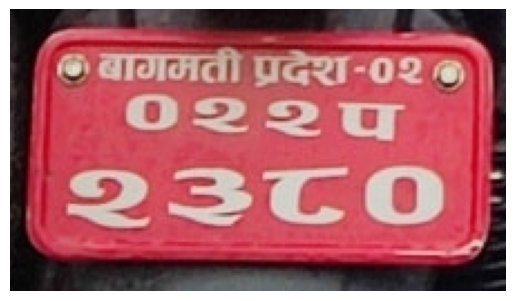

<Figure size 640x480 with 0 Axes>

In [69]:
show_license_plates_from_json(image_path, prediction2json)

In [22]:
prediction_from_boundary_box = license_detector.predict("/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png")

In [23]:
print(prediction_from_boundary_box)

{
  "x": 144.0,
  "y": 32.5,
  "width": 20.0,
  "height": 27.0,
  "confidence": 0.9678257703781128,
  "class": "8",
  "class_id": 8,
  "detection_id": "048d0d3e-82dd-4020-8e45-c10fac6d18ec",
  "image_path": "/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 48.0,
  "y": 16.5,
  "width": 24.0,
  "height": 29.0,
  "confidence": 0.9482974410057068,
  "class": "ba",
  "class_id": 10,
  "detection_id": "67d7f96d-f80a-4cc6-8658-0bd5075fb50f",
  "image_path": "/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 185.0,
  "y": 40.0,
  "width": 22.0,
  "height": 30.0,
  "confidence": 0.9095046520233154,
  "class": "7",
  "class_id": 7,
  "detection_id": "314945ed-c96c-42cd-b0a3-263a62b8af6e",
  "image_path": "/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 163.5,
  "y": 36.5,
  "width": 19.0,
  

In [24]:
boundaryjson = prediction_from_boundary_box.json()
print(boundaryjson)

{'predictions': [{'x': 144.0, 'y': 32.5, 'width': 20.0, 'height': 27.0, 'confidence': 0.9678257703781128, 'class': '8', 'class_id': 8, 'detection_id': '048d0d3e-82dd-4020-8e45-c10fac6d18ec', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 48.0, 'y': 16.5, 'width': 24.0, 'height': 29.0, 'confidence': 0.9482974410057068, 'class': 'ba', 'class_id': 10, 'detection_id': '67d7f96d-f80a-4cc6-8658-0bd5075fb50f', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 185.0, 'y': 40.0, 'width': 22.0, 'height': 30.0, 'confidence': 0.9095046520233154, 'class': '7', 'class_id': 7, 'detection_id': '314945ed-c96c-42cd-b0a3-263a62b8af6e', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 163.5, 'y': 36.5, 'width': 19.0, 'height': 27.0, 'confidence': 0.8758472800254822, 'class':

In [57]:
def concat_row(test_predictions):
    predictions = test_predictions['predictions']
    
    # Sort predictions based on y-coordinate (height) first, then x-coordinate (left-to-right)
    sorted_predictions = sorted(predictions, key=lambda x: (x['y'], x['x']))
    
    # Collect classes
    classes = [prediction['class'] for prediction in sorted_predictions]
    
    # Calculate the number of columns (assuming characters are aligned vertically)
    num_columns = len(set(prediction['x'] for prediction in sorted_predictions))
    
    # Initialize concatenated string
    concatenated_classes = ''
    
    # Loop through rows and columns to concatenate classes
    for i in range(0, len(classes), num_columns):
        row_classes = classes[i:i+num_columns]
        concatenated_classes += ', '.join(row_classes) + '\n'
    
    return concatenated_classes.strip()


In [26]:
concat_row(boundaryjson)

'ba, 7, cha, 7, 8, 2, 7'

Showing all the ROIs from the later image

In [27]:
image_path = "/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png"
boundaryjson
print(boundaryjson)

{'predictions': [{'x': 144.0, 'y': 32.5, 'width': 20.0, 'height': 27.0, 'confidence': 0.9678257703781128, 'class': '8', 'class_id': 8, 'detection_id': '048d0d3e-82dd-4020-8e45-c10fac6d18ec', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 48.0, 'y': 16.5, 'width': 24.0, 'height': 29.0, 'confidence': 0.9482974410057068, 'class': 'ba', 'class_id': 10, 'detection_id': '67d7f96d-f80a-4cc6-8658-0bd5075fb50f', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 185.0, 'y': 40.0, 'width': 22.0, 'height': 30.0, 'confidence': 0.9095046520233154, 'class': '7', 'class_id': 7, 'detection_id': '314945ed-c96c-42cd-b0a3-263a62b8af6e', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 163.5, 'y': 36.5, 'width': 19.0, 'height': 27.0, 'confidence': 0.8758472800254822, 'class':

In [28]:
import numpy as np

def show_all_rois_from_json(image_path, prediction_json):
    # Loading the image
    image = cv2.imread(image_path)

    # Getting the boundary box from the predictions
    predictions = prediction_json['predictions']

    # Sort predictions based on y-coordinate (height) first, then x-coordinate (left-to-right)
    sorted_predictions = sorted(predictions, key=lambda x: (x['y'], x['x']))

    # Calculate the number of columns (assuming characters are aligned vertically)
    num_columns = len(set(prediction['x'] for prediction in sorted_predictions))

    # Initialize subplot
    fig, axs = plt.subplots(len(predictions) // num_columns, num_columns, figsize=(10, 10))

    # If there's only one subplot, axs will be a 1D array. We need to convert it to a 2D array for consistency.
    if len(predictions) // num_columns == 1 or num_columns == 1:
        axs = np.array([axs])

    # Loop through each prediction and show the ROI
    for i, bounding_box in enumerate(sorted_predictions):
        x = bounding_box['x']
        y = bounding_box['y']
        width = bounding_box['width']
        height = bounding_box['height']

        # Calculate the coordinates of the region of interest
        x1 = max(int(x - width / 2), 0)  # Ensure x1 is non-negative
        y1 = max(int(y - height / 2), 0)  # Ensure y1 is non-negative
        x2 = min(int(x + width / 2), image.shape[1])  # Ensure x2 is within image width
        y2 = min(int(y + height / 2), image.shape[0])  # Ensure y2 is within image height

        # Crop the region of interest from the image
        roi = image[y1:y2, x1:x2]

        # If the ROI is empty, skip this iteration
        if roi.size == 0:
            continue

        # Resize the ROI to 300x300
        roi = cv2.resize(roi, (300, 300))

        # Show the cropped region of interest in the corresponding subplot
        axs[i // num_columns, i % num_columns].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        axs[i // num_columns, i % num_columns].axis('off')  # Turn off axes

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def display_bounding_boxes(image_path, prediction_json):
    # Open the image file
    im = np.array(Image.open(image_path), dtype=np.uint8)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)

    # Get the list of predictions
    predictions = prediction_json['predictions']

    # Loop through each prediction
    for prediction in predictions:
        # Get the bounding box coordinates
        x = prediction['x']
        y = prediction['y']
        width = prediction['width']
        height = prediction['height']

        # Create a Rectangle patch
        rect = patches.Rectangle((x-width/1, y-height/1), width, height, linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

In [30]:
image_path1 = '/Users/sarthakshrestha/Documents/fyp ipnybs/predict.jpg'
prediction1 = license_detector.predict("/Users/sarthakshrestha/Documents/fyp ipnybs/predict.jpg")

print(prediction1)

prediction2 = prediction1.json()

print(concat_row(prediction1.json()))


{
  "x": 66.0,
  "y": 123.0,
  "width": 40.0,
  "height": 40.0,
  "confidence": 0.9550176858901978,
  "class": "3",
  "class_id": 3,
  "detection_id": "02c43415-8647-4f44-a0b7-b92a2a6bc4a9",
  "image_path": "/Users/sarthakshrestha/Documents/fyp ipnybs/predict.jpg",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 112.0,
  "y": 111.5,
  "width": 36.0,
  "height": 35.0,
  "confidence": 0.9522336721420288,
  "class": "2",
  "class_id": 2,
  "detection_id": "c3b8ff88-e962-4015-8966-f064f10188f9",
  "image_path": "/Users/sarthakshrestha/Documents/fyp ipnybs/predict.jpg",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 82.0,
  "y": 78.5,
  "width": 38.0,
  "height": 33.0,
  "confidence": 0.9438292384147644,
  "class": "ba",
  "class_id": 10,
  "detection_id": "eec9874c-4183-4203-aebe-425773e60bec",
  "image_path": "/Users/sarthakshrestha/Documents/fyp ipnybs/predict.jpg",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 167.0,
  "y": 56.0,
  "width": 34.0,
  "height": 3

In [31]:
import cv2
import matplotlib.pyplot as plt

def display_bounding_boxes(image_path, prediction_json):
    # Read the image
    image = cv2.imread(image_path)

    # Get the list of predictions
    predictions = prediction_json['predictions']

    # Loop through each prediction
    for prediction in predictions:
        # Get the bounding box coordinates
        x = int(prediction['x'])
        y = int(prediction['y'])
        width = int(prediction['width'])
        height = int(prediction['height'])
        class_name = prediction['class']

        # Draw the bounding box
        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 1)

        # Add text annotation for class
        cv2.putText(image, class_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

    # Convert image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with bounding boxes
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

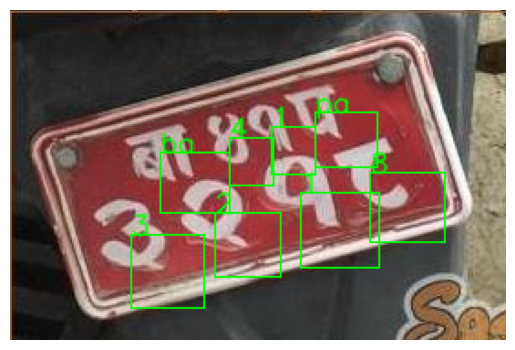

In [32]:
display_bounding_boxes(image_path1, prediction2)